In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import functions as fn
import myRCParams

In [2]:
z = 2
k = np.logspace(-1, 2, 30)
is_normalize = False

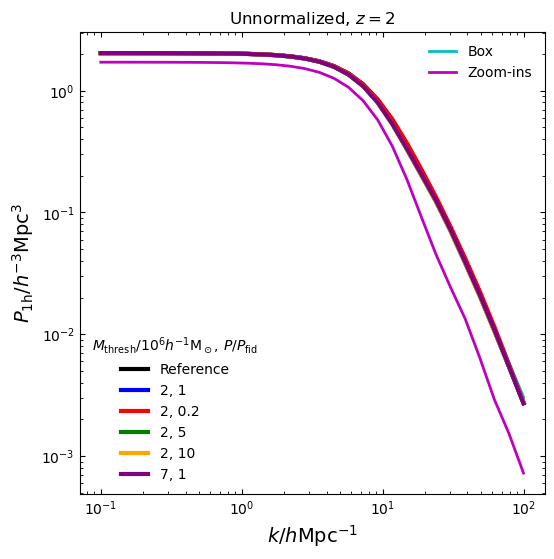

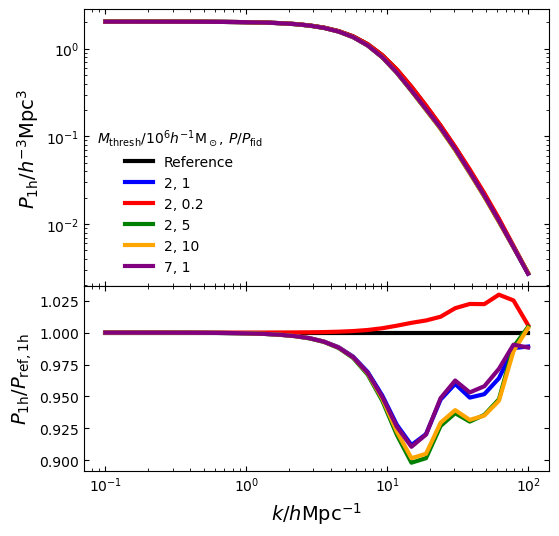

In [3]:
df_box = pd.read_csv(fn.here_path/'Power_Spectra'/f'box_z{z}.csv')
k_box = np.array(df_box.iloc[:,0])
p_1h_box = np.array(df_box.iloc[:,1])

df_zooms = pd.read_csv(fn.here_path/'Power_Spectra'/f'zoom_z{z}.csv')
k_zooms = np.array(df_zooms.iloc[:,0])
p_1h_zooms = np.array(df_zooms.iloc[:,1])

if is_normalize:
    file_name = 'norm'
    title = 'Normalized'
else:
    file_name = 'unnorm'
    title = 'Unnormalized'

lines1 = np.array([])
lines2 = np.array([])

fg, ax = plt.subplots()
ax.loglog()
ax.set_xlabel(r'$k / h \mathrm{Mpc}^{-1}$')
ax.set_ylabel(r'$P_\mathrm{1h} / h^{-3} \mathrm{Mpc}^3$')
ax.set_title(f'{title}, $z = {z}$')

fg2, ax2 = plt.subplots(2, gridspec_kw={'height_ratios':[3,2]})
fg2.subplots_adjust(hspace=0)
ax2[0].loglog()
ax2[1].semilogx()
ax2[1].set_xlabel(r'$k / h \mathrm{Mpc}^{-1}$')
ax2[0].set_ylabel(r'$P_\mathrm{1h} / h^{-3} \mathrm{Mpc}^3$')
ax2[1].set_ylabel(r'$P_\mathrm{1h} / P_\mathrm{ref,1h}$')


lines1 = np.append(lines1, ax.plot(k_box, p_1h_box, lw=2, c='c', label='Box'))
lines1 = np.append(lines1, ax.plot(k_zooms, p_1h_zooms, lw=2, c='m', label='Zoom-ins'))

for model in fn.models:
    df_model = pd.read_csv(fn.here_path/'Power_Spectra'/f'{model}_{file_name}_z{z}.csv')
    k_model = np.array(df_model.iloc[:,0])
    p_1h_model = np.array(df_model.iloc[:,1])

    if model == 'REF':
        p_1h_ref = p_1h_model

    lines2 = np.append(lines2, ax.plot(k_model, p_1h_model, lw=3, c=fn.colors[model], label=fn.labels[model]))
    ax2[0].plot(k_model, p_1h_model, lw=3, c=fn.colors[model], label=fn.labels[model])
    ax2[1].plot(k_model, p_1h_model/p_1h_ref, lw=3, c=fn.colors[model])

legend1 = ax.legend(handles=lines1.tolist(), loc='upper right')
lg = fg.gca().add_artist(legend1)
ax.legend(handles=lines2.tolist(), title=fn.legend_title)
ax2[0].legend(title=fn.legend_title)

fg.savefig(fn.here_path/'Power_Spectrum_Plots'/f'1h_{file_name}_z{z}.pdf')
fg2.savefig(fn.here_path/'Power_Spectrum_Plots'/f'Ratios_{file_name}_z{z}.pdf')